In [1]:
# Set up and load modules nothing special here
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from evtcd import *
plt.rcParams['savefig.dpi'] = 90

Real images


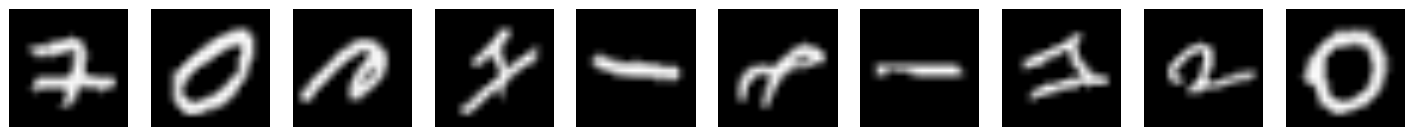

Converted spike trains


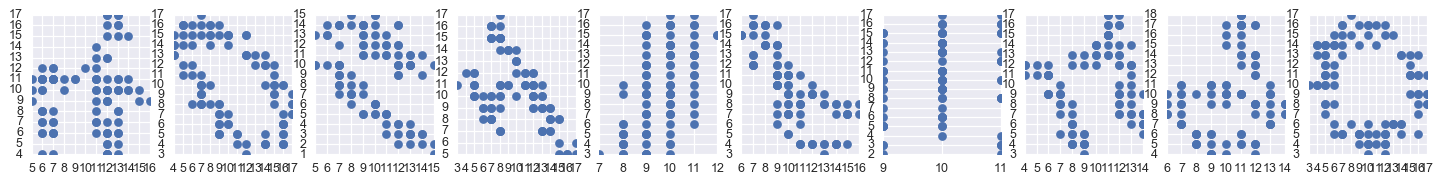

time: 4.09 s


In [2]:
spike_history = train_network(cf, 400, 100)

In [7]:
spikes_sorted = sorted(spike_history)

time: 2.72 ms


#### spikes_sorted

In [8]:
import collections
last_spike_count = 15
last_spiked_in = [collections.deque(maxlen=last_spike_count) for _ in range(5)]
plt_m, plt_n = 5, 1
plt.figure(figsize=(3 * plt_m, 3 * plt_n))

time: 6.57 ms


KeyboardInterrupt: 

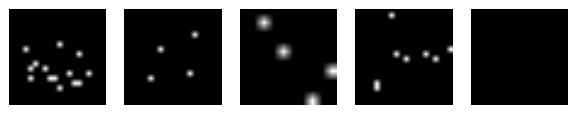

time: 1min 1s


In [9]:

for triplet in spikes_sorted:
    #print triplet
    trip_layer = triplet[1]
    last_spiked_in[trip_layer + 1].append(triplet)
    #print last_spiked_in
    # -1 th layer 20 x 20 (imaginary)
    layer_sizes = [(20, 20), (20, 20), (10, 10), (20, 20), (10, 10)]
    arrs = [np.zeros(shp) for shp in layer_sizes]
    for layer in range(5):
        display.clear_output(wait=True) 
        for sp_tr in last_spiked_in[layer]:
            #print sp_tr
            addr = sp_tr[2]
            sz_x, sz_y  = layer_sizes[layer]
            #print sz_x, sz_y, layer
            arrs[layer][addr % sz_x, addr / sz_y] = 1
        ax = plt.subplot(plt_n, plt_m, layer + 1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.gray()
        plt.imshow(arrs[layer])
        plt.draw()
    display.display(plt.gcf())
    time.sleep(0.1)

    
    